Цель: Прогнозировать спрос на товар или категорию товаров. \
Ожидаемые шаги: \
Провести исследовательский анализ данных (EDA), чтобы: \
Понять структуру данных. \
Найти возможные зависимости спроса от параметров, включая сезонность, тренды и другие факторы. \
Построить модель(и) прогноза спроса: \
Хорошо, если Вы попробуете несколько подходов (например, бустинг, AutoML, статистические модели) и сравнишь их.\
Желательно, чтобы выбор моделей был обоснован. \
Выделите зависимость спроса от цены и построй кривые эластичности. Это необязательно, но будет преимуществом. \
Ожидаемый результат \
Описательный EDA: основные выводы и визуализации. \
Модели с их сравнением и интерпретацией результатов. \
(Необязательно, но инетересно ;-)) Анализ эластичности и графики зависимости спроса от цены.


# 1 Разведочный анализ данных

## 1.1 Описание данных

Данные состоят из файлов, взятых с Dominick's datasets:
<ul>
    <li>
        beer_sales_data.parquet - продажи пива;    
    </li>
    <li>
        cig_sales_data.parquet - продажи сигарет;
    </li>
    <li>
        ana_sales_data.parquet - продажи анальгетиков;
    </li>
    <li>
        demographic_data.parquet - данные демографии и магазина;
    </li>
    <li>
        beer_upc.parquet - таблица с описанием товара пиво;
    </li>
    <li>
        cig_upc.parquet - таблица с описанием товара сигареты;
    </li>
    <li>
        ana_upc.parquet - таблица с описанием товара анальгетики;
    </li>
</ul>


In [80]:
import pandas as pd
import warnings
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import timedelta

warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
pd.options.mode.chained_assignment = None
pd.options.display.max_rows = 999
pd.options.display.float_format ='{:,.3f}'.format

## 1.3 Импорт файл 

In [6]:
beer_sales = pd.read_parquet("data_files/beer_sales_data.parquet")
demographic_data = pd.read_parquet("data_files/demographic_data.parquet")

In [7]:
beer_upc = pd.read_parquet("data_files/beer_upc.parquet", columns=['upc', 'descrip', 'size', 'nitem'])

### 1.3.1

In [8]:
beer_sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3967720 entries, 0 to 3990671
Data columns (total 7 columns):
 #   Column  Dtype  
---  ------  -----  
 0   store   int64  
 1   upc     int64  
 2   week    int64  
 3   move    int64  
 4   qty     int64  
 5   price   float64
 6   sale    object 
dtypes: float64(1), int64(5), object(1)
memory usage: 242.2+ MB


In [10]:
beer_sales.head(100)

,store,upc,week,move,qty,price,sale
0,2,294,298,11,1,2.620,None
1,2,294,299,9,1,2.510,None
2,2,294,300,6,1,2.490,None
3,2,294,301,5,1,2.990,None
4,2,294,302,1,1,2.490,None
5,2,294,303,0,1,0.000,None
6,2,294,304,1,1,4.990,None
7,2,294,305,0,1,0.000,None
8,2,294,306,0,1,0.000,None
9,2,294,307,0,1,0.000,None


In [11]:
beer_sales.describe()

,store,upc,week,move,qty,price
count,"3,967,720.000","3,967,720.000","3,967,720.000","3,967,720.000","3,967,720.000","3,967,720.000"
mean,88.817,"7,234,428,652.574",236.448,3.384,1.000,2.819
std,36.355,"10,724,292,495.783",84.101,8.877,0.003,3.422
min,2.000,294.000,91.000,0.000,1.000,0.000
25%,70.000,"3,410,015,525.000",167.000,0.000,1.000,0.000
50%,97.000,"7,199,011,600.000",236.000,0.000,1.000,0.000
75%,118.000,"7,336,077,663.000",302.000,3.000,1.000,4.990
max,146.000,"79,709,638,102.000",399.000,769.000,2.000,29.640


Проанализировав всю информацию о датасете с пивом заметим, что файл имеет почти 4 000 000 строк, \
не имеет пропусков и почти все числовые столбцы приведены к типу int64. Int64 занимает довольно много памяти, \
поэтому можно изменить его на uint8 и uint16. Также float64 можно заменить на float16.

In [12]:
beer_sales['store'] = beer_sales['store'].apply('uint8')
beer_sales['week'] = beer_sales['week'].apply('uint16')
beer_sales['move'] = beer_sales['move'].apply('uint16')
beer_sales['qty'] = beer_sales['qty'].apply('uint8')
beer_sales['price'] = beer_sales['price'].apply('float16')

Проанализируем также количество уникальных значений в столбце sale

In [13]:
beer_sales['sale'].value_counts()

sale
B    537358
S      9745
C       333
Name: count, dtype: int64

In [14]:
((beer_sales['sale'].value_counts().sum())/len(beer_sales['sale'])) * 100

13.79724375711996

Заметим, что суммароное количество не пустых значений составляет всего менее 14% от всего количества строк, что говорит о том, что большинство продаж товаров было без каких-либо скидок, купонов или акций.

In [15]:
beer_sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3967720 entries, 0 to 3990671
Data columns (total 7 columns):
 #   Column  Dtype  
---  ------  -----  
 0   store   uint8  
 1   upc     int64  
 2   week    uint16 
 3   move    uint16 
 4   qty     uint8  
 5   price   float16
 6   sale    object 
dtypes: float16(1), int64(1), object(1), uint16(2), uint8(2)
memory usage: 121.1+ MB


Получаем, что размер нашего датасета уменьшился в два раза. Перейдем к рассмотрению других датасетов

Теперь для того, чтобы перейти к дальнейшему анализу данных необходимо сначала также подготовить датасет beer_upc, смерджить два датасета и после этого продолжить исследование.

In [16]:
beer_upc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 790 entries, 0 to 789
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   upc      790 non-null    int64 
 1   descrip  790 non-null    object
 2   size     790 non-null    object
 3   nitem    790 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 24.8+ KB


In [17]:
beer_upc.head()

,upc,descrip,size,nitem
0,294,BEER LIMIT,12/12O,9990180
1,307,HEINEKEN KINGSIZE CA,259 OZ,9490410
2,710,BUDWEISER BEER,24/12O,9402300
3,711,BUDWEISER DRY BEER,24/12O,9402650
4,712,BUDWEISER LIGHT BEER,24/12O,9402600


In [18]:
beer_upc.describe()

,upc,nitem
count,790.000,790.000
mean,"9,592,659,414.381","9,072,239.172"
std,"16,066,451,710.433","9,889,993.531"
min,294.000,"-268,439,164.000"
25%,"3,410,016,705.250","9,406,852.500"
50%,"7,199,091,300.000","9,417,235.000"
75%,"8,248,812,612.500","9,450,815.000"
max,"79,709,638,102.000","9,990,180.000"


Заметим, что в датафрейме присутствуют странные значения как в столбце upc, так и в nitem: слишуом маленькое минимальное число для upc и отрицательное число для номера товара. Поэтому удалим эти значения.

In [19]:
beer_upc.drop(beer_upc[beer_upc.upc < 10000].index, inplace=True)
beer_upc.drop(beer_upc[beer_upc.nitem < 0].index, inplace= True)

In [20]:
beer_upc.describe()

,upc,nitem
count,774.000,774.000
mean,"9,782,938,271.413","9,423,241.576"
std,"16,175,200,308.696","285,774.309"
min,"245,006,405.000","3,901,620.000"
25%,"3,410,021,810.500","9,406,912.500"
50%,"7,204,001,112.500","9,417,310.000"
75%,"8,248,812,917.500","9,450,775.000"
max,"79,709,638,102.000","9,738,290.000"


In [21]:
beer_upc['upc'].astype(str).apply(len).unique()

array([ 9, 10, 11], dtype=int64)

Анализируя стандарты UPC можно сделать следующие вывод: \
Для значений с длиной 11 можно применить алгоритм, который будет вычислять последнее значение по соответствующему алгоритму. \
Для значений с длиной 10 будем считать, что так как тип столбца int, то те нули, которые стояли в начале просто ичезли, поэтому добавим им нули и также вычислим последнее значение по алгоритму.
Значения с длиной 9 будут удалены, так как они не подходят ни под один известный стандарт.

In [22]:
beer_upc.drop(beer_upc[beer_upc.upc <= 999999999].index, inplace=True)

In [23]:
beer_upc.describe()

,upc,nitem
count,769.000,769.000
mean,"9,843,057,988.433","9,422,822.497"
std,"16,210,475,239.230","286,512.660"
min,"1,035,700,155.000","3,901,620.000"
25%,"3,410,029,306.000","9,406,900.000"
50%,"7,204,001,123.000","9,417,240.000"
75%,"8,328,000,001.000","9,450,800.000"
max,"79,709,638,102.000","9,738,290.000"


In [24]:
def calculate_upc_check_digit(upc):
    upc = str(upc).strip()
    if len(upc) == 11:
        odd_sum = sum(int(upc[i]) for i in range(0, 11, 2)) * 3
        even_sum = sum(int(upc[i]) for i in range(1, 10, 2))
    elif len(upc) == 10:
        odd_sum = sum(int(upc[i]) for i in range(0, 9, 2)) * 3
        even_sum = sum(int(upc[i]) for i in range(1, 9, 2))
    total = odd_sum + even_sum
    last_digit = total % 10
    return (10 - last_digit) % 10

def transform_upc_column(df, column_name):
    def transform_upc(upc):
        upc_str = str(upc).strip()
        
        if len(upc_str) == 11:
            check_digit = calculate_upc_check_digit(upc_str)
            return upc_str + str(check_digit)

        elif len(upc_str) == 10: 
            upc_str = '0' + upc_str
            check_digit = calculate_upc_check_digit(upc_str)
            return upc_str + str(check_digit)

        else:
            return upc_str

    df[column_name] = df[column_name].apply(transform_upc)
    return df

In [25]:
beer_upc = transform_upc_column(beer_upc, 'upc')

In [26]:
beer_upc['upc'].apply(len).unique()

array([12], dtype=int64)

In [27]:
beer_upc.tail()

,upc,descrip,size,nitem
785,797096347675,OREGON BREWERY NUTBR,6/12 O,9490540
786,797096357674,OREGON RASPBERRY WHE,6/12 O,9490650
787,797096367673,OREGON HONEY RED ALE,6/12 O,9490660
788,797096371021,OREGON BLACKBERRY PO,6/12 O,9492170
789,797096381020,OREGON SUMMER GOLD,6/12 O,9490680


In [28]:
beer_sales.drop(beer_sales[beer_sales.upc <= 999999999].index, inplace=True)

In [29]:
beer_sales['upc'].astype(str).apply(len).unique()

array([10, 11], dtype=int64)

In [30]:
beer_sales = transform_upc_column(beer_sales, 'upc')

In [31]:
beer_sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3958427 entries, 9298 to 3990671
Data columns (total 7 columns):
 #   Column  Dtype  
---  ------  -----  
 0   store   uint8  
 1   upc     object 
 2   week    uint16 
 3   move    uint16 
 4   qty     uint8  
 5   price   float16
 6   sale    object 
dtypes: float16(1), object(2), uint16(2), uint8(2)
memory usage: 120.8+ MB


In [32]:
beer_data = beer_sales.merge(beer_upc, on='upc', how='left')

In [33]:
beer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3958427 entries, 0 to 3958426
Data columns (total 10 columns):
 #   Column   Dtype  
---  ------   -----  
 0   store    uint8  
 1   upc      object 
 2   week     uint16 
 3   move     uint16 
 4   qty      uint8  
 5   price    float16
 6   sale     object 
 7   descrip  object 
 8   size     object 
 9   nitem    float64
dtypes: float16(1), float64(1), object(4), uint16(2), uint8(2)
memory usage: 181.2+ MB


In [34]:
beer_data.head()

,store,upc,week,move,qty,price,sale,descrip,size,nitem
0,123,010357001551,178,0,1,0.000,None,O.B. KOREAN IMPORTED,6/12 O,"9,412,650.000"
1,123,010357001551,179,1,1,4.988,None,O.B. KOREAN IMPORTED,6/12 O,"9,412,650.000"
2,123,010357001551,180,4,1,4.988,None,O.B. KOREAN IMPORTED,6/12 O,"9,412,650.000"
3,123,010357001551,181,1,1,4.988,None,O.B. KOREAN IMPORTED,6/12 O,"9,412,650.000"
4,123,010357001551,182,5,1,4.988,None,O.B. KOREAN IMPORTED,6/12 O,"9,412,650.000"


In [35]:
beer_data['sale'] = beer_data['sale'].fillna('U')

In [36]:
beer_data['sale'].unique()

array(['U', 'B', 'S', 'C'], dtype=object)

Так как в Sale у нас категориальные признаки, то нужно уйти от них с помощью OHE, и чтобы не попасть в dummy-ловушку указать параметр drop_first=True.

In [37]:
beer_data_ohe = pd.get_dummies(beer_data, columns=['sale'], drop_first=True, dtype=int)

In [38]:
beer_data_ohe.head()

,store,upc,week,move,qty,price,descrip,size,nitem,sale_C,sale_S,sale_U
0,123,010357001551,178,0,1,0.000,O.B. KOREAN IMPORTED,6/12 O,"9,412,650.000",0,0,1
1,123,010357001551,179,1,1,4.988,O.B. KOREAN IMPORTED,6/12 O,"9,412,650.000",0,0,1
2,123,010357001551,180,4,1,4.988,O.B. KOREAN IMPORTED,6/12 O,"9,412,650.000",0,0,1
3,123,010357001551,181,1,1,4.988,O.B. KOREAN IMPORTED,6/12 O,"9,412,650.000",0,0,1
4,123,010357001551,182,5,1,4.988,O.B. KOREAN IMPORTED,6/12 O,"9,412,650.000",0,0,1


In [39]:
beer_data_ohe.head(20)

,store,upc,week,move,qty,price,descrip,size,nitem,sale_C,sale_S,sale_U
0,123,010357001551,178,0,1,0.000,O.B. KOREAN IMPORTED,6/12 O,"9,412,650.000",0,0,1
1,123,010357001551,179,1,1,4.988,O.B. KOREAN IMPORTED,6/12 O,"9,412,650.000",0,0,1
2,123,010357001551,180,4,1,4.988,O.B. KOREAN IMPORTED,6/12 O,"9,412,650.000",0,0,1
3,123,010357001551,181,1,1,4.988,O.B. KOREAN IMPORTED,6/12 O,"9,412,650.000",0,0,1
4,123,010357001551,182,5,1,4.988,O.B. KOREAN IMPORTED,6/12 O,"9,412,650.000",0,0,1
5,123,010357001551,183,2,1,4.988,O.B. KOREAN IMPORTED,6/12 O,"9,412,650.000",0,0,1
6,123,010357001551,184,6,1,4.988,O.B. KOREAN IMPORTED,6/12 O,"9,412,650.000",0,0,1
7,123,010357001551,185,1,1,4.988,O.B. KOREAN IMPORTED,6/12 O,"9,412,650.000",0,0,1
8,123,010357001551,186,1,1,4.988,O.B. KOREAN IMPORTED,6/12 O,"9,412,650.000",0,0,1
9,123,010357001551,187,7,1,4.988,O.B. KOREAN IMPORTED,6/12 O,"9,412,650.000",0,0,1


Теперь удалим столбцы, которые не понадобятся для дальнейшего анализа

In [40]:
beer_data_n = beer_data_ohe.drop(['descrip', 'size'], axis= 1)

In [41]:
beer_data_n.corr()

,store,upc,week,move,qty,price,nitem,sale_C,sale_S,sale_U
store,1.000,0.017,0.042,0.030,-0.001,0.047,-0.004,-0.004,-0.001,-0.007
upc,0.017,1.000,0.276,-0.063,0.000,-0.057,0.023,0.000,-0.008,-0.011
week,0.042,0.276,1.000,-0.080,-0.003,-0.027,0.034,-0.007,-0.007,-0.033
move,0.030,-0.063,-0.080,1.000,0.014,0.347,0.010,0.012,0.108,-0.353
qty,-0.001,0.000,-0.003,0.014,1.000,0.000,-0.000,-0.000,-0.000,-0.002
price,0.047,-0.057,-0.027,0.347,0.000,1.000,0.013,0.011,0.064,-0.369
nitem,-0.004,0.023,0.034,0.010,-0.000,0.013,1.000,-0.000,0.002,-0.012
sale_C,-0.004,0.000,-0.007,0.012,-0.000,0.011,-0.000,1.000,-0.000,-0.023
sale_S,-0.001,-0.008,-0.007,0.108,-0.000,0.064,0.002,-0.000,1.000,-0.124
sale_U,-0.007,-0.011,-0.033,-0.353,-0.002,-0.369,-0.012,-0.023,-0.124,1.000


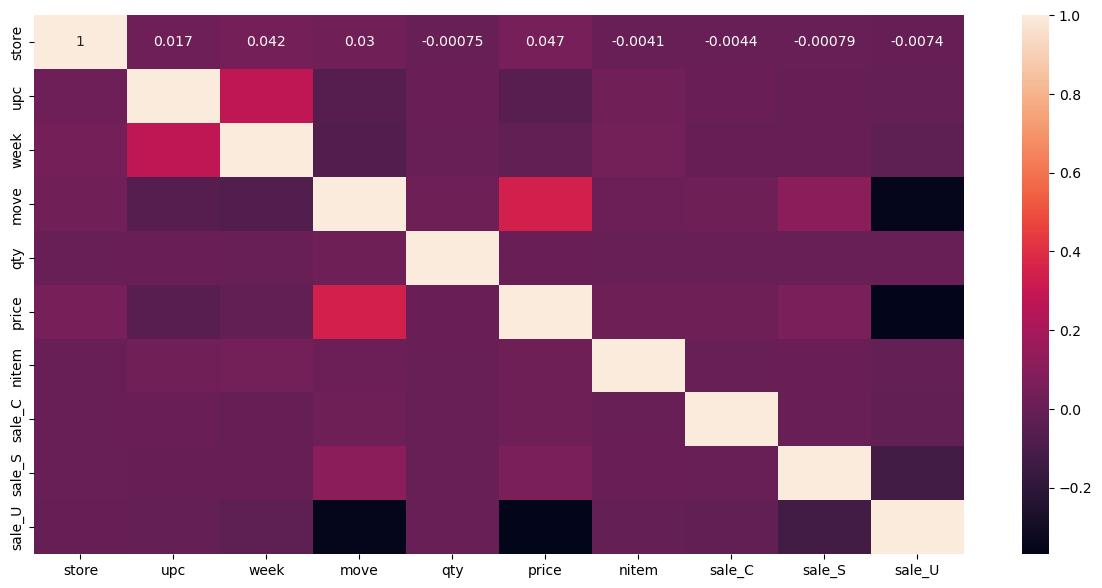

In [42]:
plt.figure(figsize=(15, 7))
sns.heatmap(beer_data_n.corr(), annot= True)
plt.show()

По графику видно, что между столбцами нет сильной корреляции - только между ценой и количестром купленного товара корреляция составляет 0.35, также обратная корреляция наблюдается между количеством купленных товаров и обычной ценой без каких-либо спец. предложений.

In [43]:
demographic_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 107 entries, 1 to 107
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   store     107 non-null    float64
 1   age60     97 non-null     float32
 2   age9      97 non-null     float32
 3   educ      97 non-null     float32
 4   ethnic    97 non-null     float32
 5   income    97 non-null     float32
 6   hhlarge   97 non-null     float32
 7   workwom   97 non-null     float32
 8   hval150   97 non-null     float32
 9   sstrdist  85 non-null     float32
 10  sstrvol   85 non-null     float32
 11  cpdist5   85 non-null     float32
 12  cpwvol5   85 non-null     float32
dtypes: float32(12), float64(1)
memory usage: 6.7 KB


In [44]:
demographic_data.describe()

,store,age60,age9,educ,ethnic,income,hhlarge,workwom,hval150,sstrdist,sstrvol,cpdist5,cpwvol5
count,107.000,97.000,97.000,97.000,97.000,97.000,97.000,97.000,97.000,85.000,85.000,85.000,85.000
mean,104.935,0.170,0.140,0.219,0.154,10.609,0.118,0.358,0.338,5.027,1.214,2.109,0.448
std,80.323,0.064,0.027,0.108,0.183,0.278,0.032,0.051,0.237,3.477,0.528,0.737,0.224
min,2.000,0.058,0.046,0.050,0.023,9.867,0.014,0.244,0.003,0.132,0.400,0.773,0.095
25%,54.500,0.120,0.121,0.144,0.044,10.480,0.098,0.313,0.134,2.636,0.727,1.626,0.289
50%,91.000,0.160,0.140,0.221,0.075,10.635,0.113,0.355,0.342,4.235,1.115,1.963,0.394
75%,120.000,0.213,0.155,0.280,0.188,10.775,0.135,0.402,0.506,6.498,1.562,2.534,0.602
max,315.000,0.313,0.200,0.528,0.996,11.236,0.216,0.472,0.917,17.856,2.571,4.108,1.143


In [45]:
demographic_data.head()

,store,age60,age9,educ,ethnic,income,hhlarge,workwom,hval150,sstrdist,sstrvol,cpdist5,cpwvol5
1,2.000,0.233,0.118,0.249,0.114,10.553,0.104,0.304,0.464,2.110,1.143,1.927,0.377
2,4.000,0.262,0.095,0.221,0.062,10.647,0.088,0.362,0.522,2.373,1.000,1.104,0.772
3,5.000,0.117,0.141,0.321,0.054,10.922,0.103,0.411,0.536,3.802,0.682,1.601,0.736
4,8.000,0.252,0.123,0.095,0.035,10.597,0.132,0.283,0.054,2.636,1.500,2.905,0.641
5,9.000,0.269,0.104,0.222,0.033,10.787,0.097,0.359,0.506,1.103,0.667,1.820,0.441


In [46]:
demographic_data['store'] = demographic_data['store'].apply('uint8')
demographic_data['age60'] = demographic_data['age60'].apply('float16')
demographic_data['age9'] = demographic_data['age9'].apply('float16')
demographic_data['educ'] = demographic_data['educ'].apply('float16')
demographic_data['ethnic'] = demographic_data['ethnic'].apply('float16')
demographic_data['income'] = demographic_data['income'].apply('float16')
demographic_data['hhlarge'] = demographic_data['hhlarge'].apply('float16')
demographic_data['workwom'] = demographic_data['workwom'].apply('float16')
demographic_data['hval150'] = demographic_data['hval150'].apply('float16')
demographic_data['sstrdist'] = demographic_data['sstrdist'].apply('float16')
demographic_data['sstrvol'] = demographic_data['sstrvol'].apply('float16')
demographic_data['cpdist5'] = demographic_data['cpdist5'].apply('float16')
demographic_data['cpwvol5'] = demographic_data['cpwvol5'].apply('float16')

In [47]:
demographic_data.isna().sum()

store        0
age60       10
age9        10
educ        10
ethnic      10
income      10
hhlarge     10
workwom     10
hval150     10
sstrdist    22
sstrvol     22
cpdist5     22
cpwvol5     22
dtype: int64

Заметим, что присутствуют пропуски в датасете. Однако, в некоторых столбцах значений пропущено больше, поэтому удалим полностью строки, где пропущены все значения в них.

In [48]:
demographic_data

,store,age60,age9,educ,ethnic,income,hhlarge,workwom,hval150,sstrdist,sstrvol,cpdist5,cpwvol5
1,2,0.233,0.117,0.249,0.114,10.555,0.104,0.303,0.464,2.109,1.143,1.928,0.377
2,4,0.262,0.095,0.221,0.062,10.648,0.088,0.362,0.522,2.373,1.000,1.104,0.772
3,5,0.117,0.141,0.321,0.054,10.922,0.103,0.411,0.536,3.803,0.682,1.601,0.736
4,8,0.252,0.123,0.095,0.035,10.594,0.132,0.283,0.054,2.637,1.500,2.906,0.641
5,9,0.269,0.104,0.222,0.033,10.789,0.097,0.359,0.506,1.104,0.667,1.820,0.441
6,12,0.178,0.106,0.253,0.381,10.000,0.057,0.391,0.387,9.195,1.111,0.839,0.106
7,14,0.214,0.130,0.348,0.034,11.047,0.108,0.362,0.751,3.320,0.750,2.359,0.732
8,18,0.272,0.110,0.072,0.074,10.391,0.098,0.314,0.093,1.980,0.667,1.685,0.154
9,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,21,0.067,0.176,0.177,0.105,10.719,0.164,0.406,0.123,0.268,1.050,1.954,0.602


In [49]:
demographic_data = demographic_data.drop(demographic_data[demographic_data['age60'].isna() == True].index)

In [50]:
demographic_data.isna().sum()

store        0
age60        0
age9         0
educ         0
ethnic       0
income       0
hhlarge      0
workwom      0
hval150      0
sstrdist    12
sstrvol     12
cpdist5     12
cpwvol5     12
dtype: int64

In [51]:
demographic_data.describe()

,store,age60,age9,educ,ethnic,income,hhlarge,workwom,hval150,sstrdist,sstrvol,cpdist5,cpwvol5
count,97.000,97.000,97.000,97.000,97.000,97.000,97.000,97.000,97.000,85.000,85.000,85.000,85.000
mean,76.247,0.170,0.140,0.219,0.154,10.609,0.118,0.359,0.339,5.027,1.214,2.109,0.448
std,35.501,0.064,0.027,0.108,0.183,0.278,0.032,0.051,0.237,3.477,0.528,0.737,0.224
min,2.000,0.058,0.046,0.050,0.023,9.867,0.014,0.245,0.003,0.132,0.400,0.772,0.095
25%,50.000,0.120,0.121,0.144,0.044,10.477,0.098,0.313,0.134,2.637,0.727,1.626,0.289
50%,76.000,0.160,0.140,0.221,0.075,10.633,0.113,0.355,0.342,4.234,1.115,1.964,0.394
75%,106.000,0.213,0.155,0.280,0.188,10.773,0.135,0.402,0.506,6.496,1.562,2.533,0.602
max,137.000,0.313,0.200,0.528,0.996,11.234,0.216,0.472,0.917,17.859,2.572,4.109,1.144


In [66]:
beer_dt_end = beer_data_n.merge(demographic_data, on='store', how='left')

In [67]:
beer_dt_end.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4225403 entries, 0 to 4225402
Data columns (total 22 columns):
 #   Column    Dtype  
---  ------    -----  
 0   store     uint8  
 1   upc       object 
 2   week      uint16 
 3   move      uint16 
 4   qty       uint8  
 5   price     float16
 6   nitem     float64
 7   sale_C    int32  
 8   sale_S    int32  
 9   sale_U    int32  
 10  age60     float16
 11  age9      float16
 12  educ      float16
 13  ethnic    float16
 14  income    float16
 15  hhlarge   float16
 16  workwom   float16
 17  hval150   float16
 18  sstrdist  float16
 19  sstrvol   float16
 20  cpdist5   float16
 21  cpwvol5   float16
dtypes: float16(13), float64(1), int32(3), object(1), uint16(2), uint8(2)
memory usage: 241.8+ MB


In [68]:
beer_dt_end = beer_dt_end.drop(beer_dt_end[beer_dt_end['age60'].isna() == True].index)

In [69]:
beer_dt_end.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3996912 entries, 0 to 4225364
Data columns (total 22 columns):
 #   Column    Dtype  
---  ------    -----  
 0   store     uint8  
 1   upc       object 
 2   week      uint16 
 3   move      uint16 
 4   qty       uint8  
 5   price     float16
 6   nitem     float64
 7   sale_C    int32  
 8   sale_S    int32  
 9   sale_U    int32  
 10  age60     float16
 11  age9      float16
 12  educ      float16
 13  ethnic    float16
 14  income    float16
 15  hhlarge   float16
 16  workwom   float16
 17  hval150   float16
 18  sstrdist  float16
 19  sstrvol   float16
 20  cpdist5   float16
 21  cpwvol5   float16
dtypes: float16(13), float64(1), int32(3), object(1), uint16(2), uint8(2)
memory usage: 259.2+ MB


In [70]:
beer_dt_end.drop_duplicates()

,store,upc,week,move,qty,price,nitem,sale_C,sale_S,sale_U,...,educ,ethnic,income,hhlarge,workwom,hval150,sstrdist,sstrvol,cpdist5,cpwvol5
0,123,010357001551,178,0,1,0.000,"9,412,650.000",0,0,1,...,0.153,0.205,10.336,0.145,0.312,0.229,7.449,1.111,1.607,0.167
1,123,010357001551,179,1,1,4.988,"9,412,650.000",0,0,1,...,0.153,0.205,10.336,0.145,0.312,0.229,7.449,1.111,1.607,0.167
2,123,010357001551,180,4,1,4.988,"9,412,650.000",0,0,1,...,0.153,0.205,10.336,0.145,0.312,0.229,7.449,1.111,1.607,0.167
3,123,010357001551,181,1,1,4.988,"9,412,650.000",0,0,1,...,0.153,0.205,10.336,0.145,0.312,0.229,7.449,1.111,1.607,0.167
4,123,010357001551,182,5,1,4.988,"9,412,650.000",0,0,1,...,0.153,0.205,10.336,0.145,0.312,0.229,7.449,1.111,1.607,0.167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4225360,134,797096381020,395,0,1,0.000,"9,490,680.000",0,0,1,...,0.248,0.106,10.719,0.155,0.388,0.346,6.680,1.973,3.225,0.657
4225361,134,797096381020,396,0,1,0.000,"9,490,680.000",0,0,1,...,0.248,0.106,10.719,0.155,0.388,0.346,6.680,1.973,3.225,0.657
4225362,134,797096381020,397,0,1,0.000,"9,490,680.000",0,0,1,...,0.248,0.106,10.719,0.155,0.388,0.346,6.680,1.973,3.225,0.657
4225363,134,797096381020,398,0,1,0.000,"9,490,680.000",0,0,1,...,0.248,0.106,10.719,0.155,0.388,0.346,6.680,1.973,3.225,0.657


<Axes: >

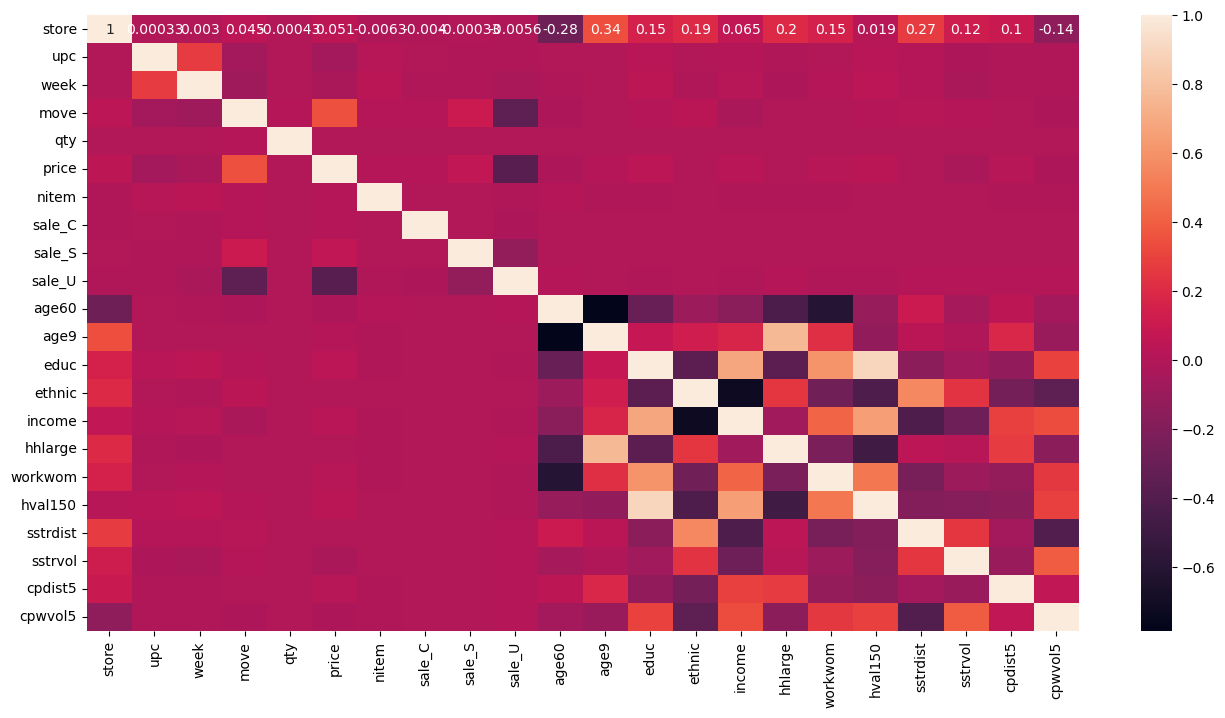

In [71]:
plt.figure(figsize= (16, 8))
sns.heatmap(beer_dt_end.corr(), annot= True)

In [72]:
beer_dt_end.isnull().sum()

store            0
upc              0
week             0
move             0
qty              0
price            0
nitem         4348
sale_C           0
sale_S           0
sale_U           0
age60            0
age9             0
educ             0
ethnic           0
income           0
hhlarge          0
workwom          0
hval150          0
sstrdist    266976
sstrvol     266976
cpdist5     266976
cpwvol5     266976
dtype: int64

Заметим, что в итоговой выборке присутствуют пропуски. Но так как количество пропуском довольно мало в процентном соотношении по сравннию с общим количеством всех строк в датасете (около 6,6%), то удалим эти строки.

In [73]:
beer_dt_end = beer_dt_end.dropna()

In [74]:
beer_dt_end.isnull().sum()

store       0
upc         0
week        0
move        0
qty         0
price       0
nitem       0
sale_C      0
sale_S      0
sale_U      0
age60       0
age9        0
educ        0
ethnic      0
income      0
hhlarge     0
workwom     0
hval150     0
sstrdist    0
sstrvol     0
cpdist5     0
cpwvol5     0
dtype: int64

In [75]:
beer_end = beer_dt_end

In [79]:
def calculate_week_dates(week):
    week_start = initial_date + timedelta(weeks=(week - 91))
    week_end = week_start + timedelta(days=6)
    return week_start, week_end

In [82]:
initial_date = pd.to_datetime("1991-06-06")

In [83]:
beer_end['week_start'], beer_end['week_end'] = zip(*beer_end['week'].apply(calculate_week_dates))

In [92]:
beer_end.head()

,store,upc,week,move,qty,price,nitem,sale_C,sale_S,sale_U,...,income,hhlarge,workwom,hval150,sstrdist,sstrvol,cpdist5,cpwvol5,week_start,week_end
1245617,128,034100215798,91,0,1,0.000,"9,450,200.000",0,0,1,...,10.156,0.100,0.398,0.266,10.664,2.000,1.409,0.259,1991-06-06,1991-06-12
1883989,14,068213061126,91,6,1,4.391,"9,440,300.000",0,0,0,...,11.047,0.108,0.362,0.751,3.320,0.750,2.359,0.732,1991-06-06,1991-06-12
951145,134,034100016029,91,4,1,6.789,"9,450,600.000",0,0,1,...,10.719,0.155,0.388,0.346,6.680,1.973,3.225,0.657,1991-06-06,1991-06-12
3164835,110,073360776618,91,0,1,0.000,"9,409,180.000",0,0,1,...,10.523,0.162,0.404,0.233,8.461,0.955,2.336,0.322,1991-06-06,1991-06-12
306548,94,018200008344,91,3,1,3.689,"9,401,880.000",0,0,1,...,10.742,0.128,0.402,0.367,3.961,1.495,1.805,0.427,1991-06-06,1991-06-12


In [93]:
beer_end.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3725756 entries, 1245617 to 4225364
Data columns (total 24 columns):
 #   Column      Dtype         
---  ------      -----         
 0   store       uint8         
 1   upc         object        
 2   week        uint16        
 3   move        uint16        
 4   qty         uint8         
 5   price       float16       
 6   nitem       float64       
 7   sale_C      int32         
 8   sale_S      int32         
 9   sale_U      int32         
 10  age60       float16       
 11  age9        float16       
 12  educ        float16       
 13  ethnic      float16       
 14  income      float16       
 15  hhlarge     float16       
 16  workwom     float16       
 17  hval150     float16       
 18  sstrdist    float16       
 19  sstrvol     float16       
 20  cpdist5     float16       
 21  cpwvol5     float16       
 22  week_start  datetime64[ns]
 23  week_end    datetime64[ns]
dtypes: datetime64[ns](2), float16(13), float64(1), in

In [103]:
beer_end.describe()

C:\ProgramData\anaconda3\Lib\site-packages\pandas\core\nanops.py:1479: RuntimeWarning: overflow encountered in cast
  return dtype.type(n)
C:\ProgramData\anaconda3\Lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
C:\ProgramData\anaconda3\Lib\site-packages\pandas\core\nanops.py:731: RuntimeWarning: invalid value encountered in scalar divide
  the_mean = the_sum / count if count > 0 else np.nan
C:\ProgramData\anaconda3\Lib\site-packages\pandas\core\nanops.py:1479: RuntimeWarning: overflow encountered in cast
  return dtype.type(n)
C:\ProgramData\anaconda3\Lib\site-packages\pandas\core\nanops.py:1479: RuntimeWarning: overflow encountered in cast
  return dtype.type(n)
C:\ProgramData\anaconda3\Lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
C:\ProgramData\anaconda3\Lib\site-pack

,store,week,move,qty,price,nitem,sale_C,sale_S,sale_U,age60,age9,educ,ethnic,income,hhlarge,workwom,hval150,sstrdist,sstrvol,cpdist5,cpwvol5,week_start,week_end
count,"3,725,756.000","3,725,756.000","3,725,756.000","3,725,756.000","3,725,756.000","3,725,756.000","3,725,756.000","3,725,756.000","3,725,756.000","3,725,756.000","3,725,756.000","3,725,756.000","3,725,756.000","3,725,756.000","3,725,756.000","3,725,756.000","3,725,756.000","3,725,756.000","3,725,756.000","3,725,756.000","3,725,756.000",3725756,3725756
mean,85.867,233.579,3.413,1.000,NaN,"9,417,057.189",0.000,0.002,0.863,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1994-02-28 01:19:07.905122688,1994-03-06 01:19:07.905122816
min,2.000,91.000,0.000,1.000,0.000,"3,901,620.000",0.000,0.000,0.000,0.058,0.046,0.050,0.024,9.867,0.014,0.245,0.003,0.132,0.400,0.772,0.095,1991-06-06 00:00:00,1991-06-12 00:00:00
25%,68.000,165.000,0.000,1.000,0.000,"9,406,430.000",0.000,0.000,1.000,0.117,0.119,0.144,0.042,10.414,0.097,0.312,0.100,2.637,0.706,1.626,0.272,1992-11-05 00:00:00,1992-11-11 00:00:00
50%,94.000,233.000,0.000,1.000,0.000,"9,412,000.000",0.000,0.000,1.000,0.171,0.139,0.220,0.074,10.648,0.114,0.359,0.346,4.234,1.091,2.008,0.383,1994-02-24 00:00:00,1994-03-02 00:00:00
75%,115.000,298.000,3.000,1.000,4.988,"9,450,300.000",0.000,0.000,1.000,0.223,0.160,0.280,0.188,10.797,0.135,0.398,0.534,6.680,1.500,2.656,0.554,1995-05-25 00:00:00,1995-05-31 00:00:00
max,137.000,399.000,769.000,2.000,29.641,"9,738,290.000",1.000,1.000,1.000,0.307,0.193,0.528,0.996,11.234,0.216,0.472,0.917,17.859,2.572,4.109,1.144,1997-05-01 00:00:00,1997-05-07 00:00:00
std,35.368,82.960,8.927,0.003,0.000,"306,999.882",0.009,0.050,0.344,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,NaN,NaN


In [102]:
pd.set_option('display.max_columns', None)

Перейдем теперь к временному анализу. Сначала выдвинем несколько гипотез:
<ul>
    <li>
        С увеличением дохода в области, продажи товаров будут увеличиваться.   
    </li>
    <li>
         Есть сезонность в продажах, и определенные недели будут иметь пик продаж.
    </li>
    <li>
        Продажи товаров различных категорий могут быть связаны между собой, то есть рост продаж одного товара может влиять на рост другого.
    </li>
    <li>
        Повышение цен на товары будет связано с уменьшением объема продаж.
    </li>
</ul>

In [111]:
weekly_summary = beer_end.groupby('week_start').agg({
    'qty': 'sum',         
    'price': 'mean',
    'sale_C': 'sum',
    'sale_S': 'sum',
    'sale_U': 'sum',
    'income': 'mean'
}).reset_index()
weekly_summary.columns = ['week_start', 'total_qty', 'avg_price', 'total_sale_C', 'total_sale_S', 'total_sale_U', 'income']

In [113]:
weekly_summary.head()

,week_start,total_qty,avg_price,total_sale_C,total_sale_S,total_sale_U,income
0,1991-06-06,12310,2.947,0,0,11046,10.615
1,1991-06-13,12678,2.973,0,0,11365,10.605
2,1991-06-20,12523,2.983,0,0,10664,10.613
3,1991-06-27,12678,2.800,0,0,11297,10.605
4,1991-07-04,12511,2.971,0,0,11252,10.603


In [114]:
weekly_summary.describe()

,week_start,total_qty,avg_price,total_sale_C,total_sale_S,total_sale_U,income
count,302,302.000,302.000,302.000,302.000,302.000,302.000
mean,1994-05-16 01:21:03.576158976,"12,337.086",2.782,1.103,30.447,"10,644.295",10.617
min,1991-06-06 00:00:00,"5,656.000",1.632,0.000,0.000,"4,107.000",10.590
25%,1992-11-13 18:00:00,"8,451.000",2.603,0.000,0.000,"7,488.000",10.608
50%,1994-05-01 12:00:00,"12,789.500",2.812,0.000,0.000,"11,431.000",10.613
75%,1995-11-21 06:00:00,"14,907.000",2.953,0.000,16.000,"12,839.750",10.632
max,1997-05-01 00:00:00,"17,472.000",3.358,56.000,450.000,"15,406.000",10.643
std,NaN,"3,356.156",0.255,6.001,72.409,"2,966.777",0.012


Заметим, что с данными все хорошо, отрациательных значений нет, выбросов сильных тоже, поэтому перейдем к графикам.

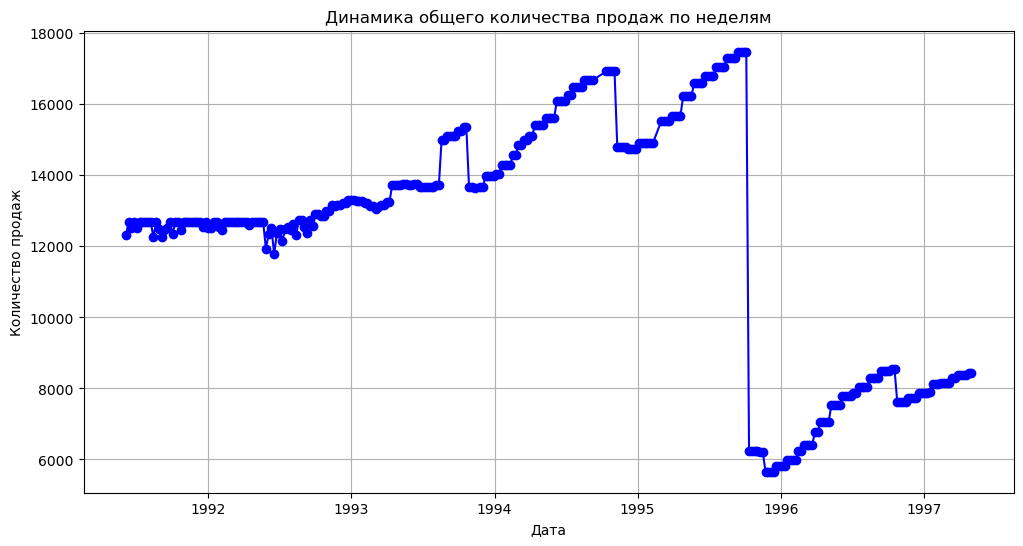

In [123]:
plt.figure(figsize=(12, 6))
plt.plot(weekly_summary['week_start'], weekly_summary['total_qty'], marker='o', linestyle='-', color='b')
plt.title("Динамика общего количества продаж по неделям")
plt.xlabel("Дата")
plt.ylabel("Количество продаж")
plt.grid()
plt.show()

По графику видим, что начиная с 1991 года продажи идут равномерно, есть небольшие приросты и падения. Однако, ближе к 1996 году продажи очень резко падают почти в 3 раза, но после этого постепенно начинают восстанавливаться.

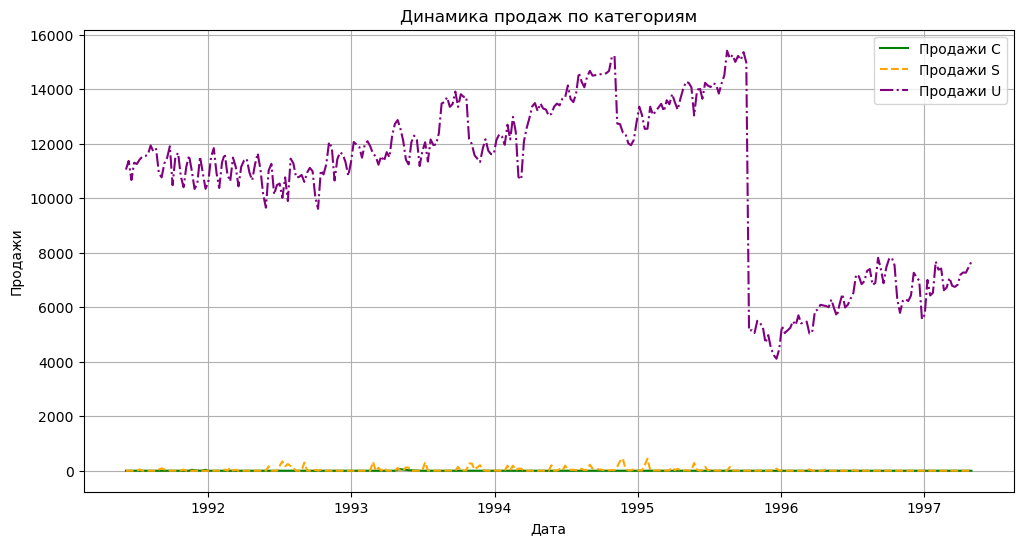

In [122]:
plt.figure(figsize=(12, 6))
plt.plot(weekly_summary['week_start'], weekly_summary['total_sale_C'], label='Продажи C', linestyle='-', color='g')
plt.plot(weekly_summary['week_start'], weekly_summary['total_sale_S'], label='Продажи S', linestyle='--', color='orange')
plt.plot(weekly_summary['week_start'], weekly_summary['total_sale_U'], label='Продажи U', linestyle='-.', color='purple')

plt.title("Динамика продаж по категориям")
plt.xlabel("Дата")
plt.ylabel("Продажи")
plt.legend()
plt.grid()
plt.show()


По графику также виден перепад для продаж. Однако, этот перепад соответсвует только обычным продажам без каких либо акций. Продажи со скидками и продажи по сниженным ценам сильно не изменяются. Рассмотрим их поподробнее.

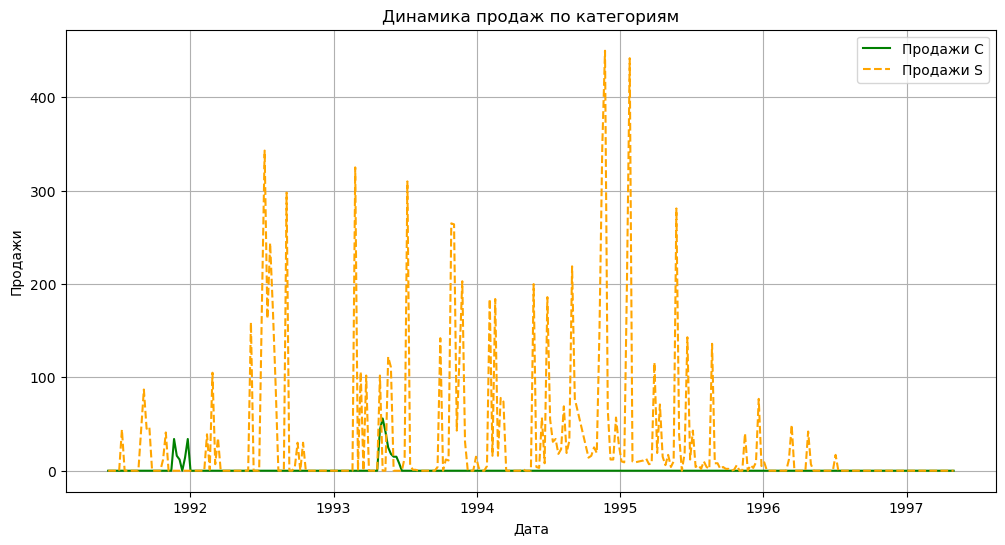

In [121]:
plt.figure(figsize=(12, 6))
plt.plot(weekly_summary['week_start'], weekly_summary['total_sale_C'], label='Продажи C', linestyle='-', color='g')
plt.plot(weekly_summary['week_start'], weekly_summary['total_sale_S'], label='Продажи S', linestyle='--', color='orange')

plt.title("Динамика продаж по категориям")
plt.xlabel("Дата")
plt.ylabel("Продажи")
plt.legend()
plt.grid()
plt.show()


Заметим, что присутствуют сильные скачки при продаже по сниженной цене. \
Добавим скользящее среднее для количества продаж


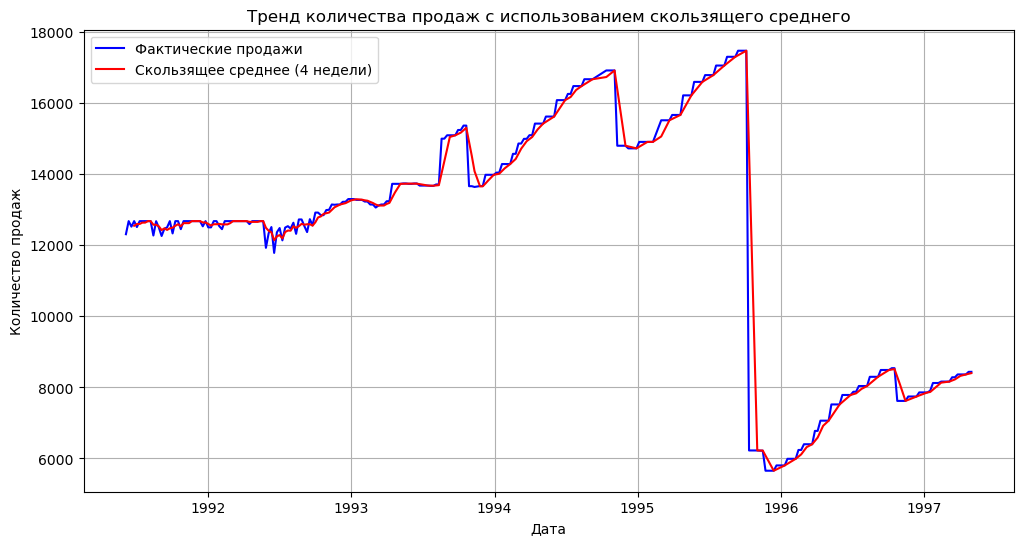

In [120]:
weekly_summary['rolling_qty'] = weekly_summary['total_qty'].rolling(window=4).mean()

plt.figure(figsize=(12, 6))
plt.plot(weekly_summary['week_start'], weekly_summary['total_qty'], label="Фактические продажи", color='b')
plt.plot(weekly_summary['week_start'], weekly_summary['rolling_qty'], label="Скользящее среднее (4 недели)", color='r')
plt.title("Тренд количества продаж с использованием скользящего среднего")
plt.xlabel("Дата")
plt.ylabel("Количество продаж")
plt.legend()
plt.grid()
plt.show()


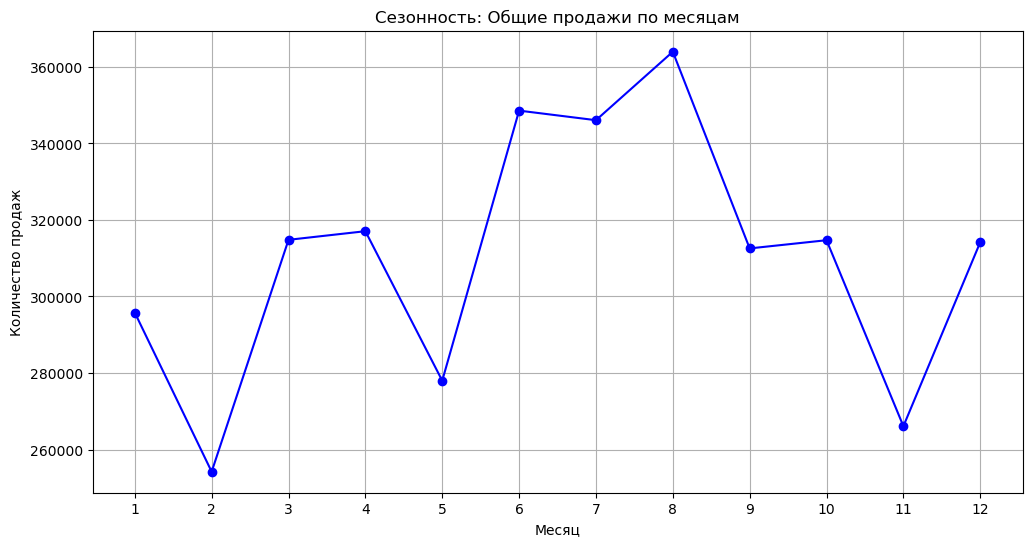

In [124]:
weekly_summary['month'] = weekly_summary['week_start'].dt.month

monthly_summary = weekly_summary.groupby('month').agg({
    'total_qty': 'sum',
    'avg_price': 'mean',
}).reset_index()

plt.figure(figsize=(12, 6))
plt.plot(monthly_summary['month'], monthly_summary['total_qty'], marker='o', linestyle='-', color='b')
plt.title("Сезонность: Общие продажи по месяцам")
plt.xlabel("Месяц")
plt.ylabel("Количество продаж")
plt.xticks(range(1, 13))
plt.grid()
plt.show()


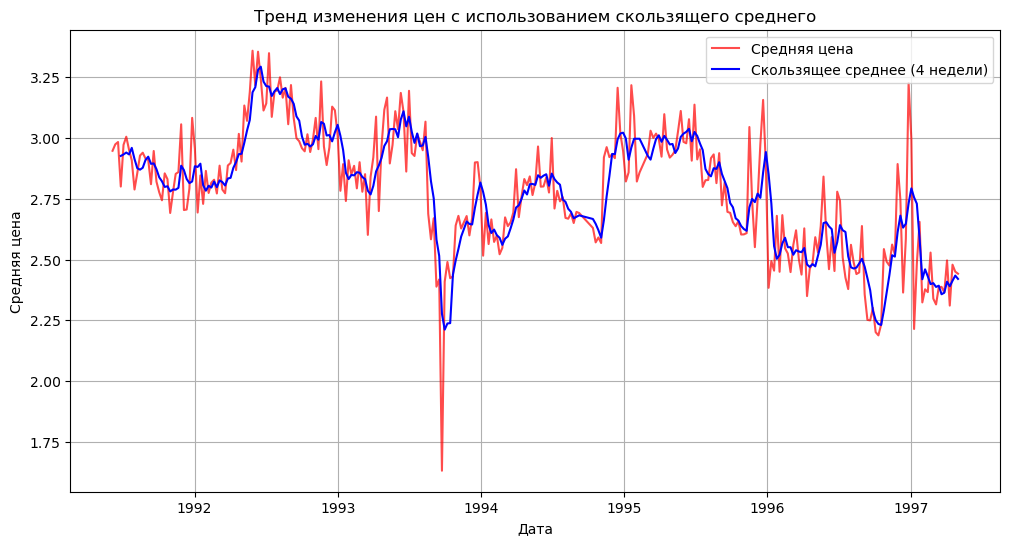

In [125]:
weekly_summary['rolling_price'] = weekly_summary['avg_price'].rolling(window=4).mean()

plt.figure(figsize=(12, 6))
plt.plot(weekly_summary['week_start'], weekly_summary['avg_price'], label="Средняя цена", color='r', alpha=0.7)
plt.plot(weekly_summary['week_start'], weekly_summary['rolling_price'], label="Скользящее среднее (4 недели)", color='b')
plt.title("Тренд изменения цен с использованием скользящего среднего")
plt.xlabel("Дата")
plt.ylabel("Средняя цена")
plt.legend()
plt.grid()
plt.show()


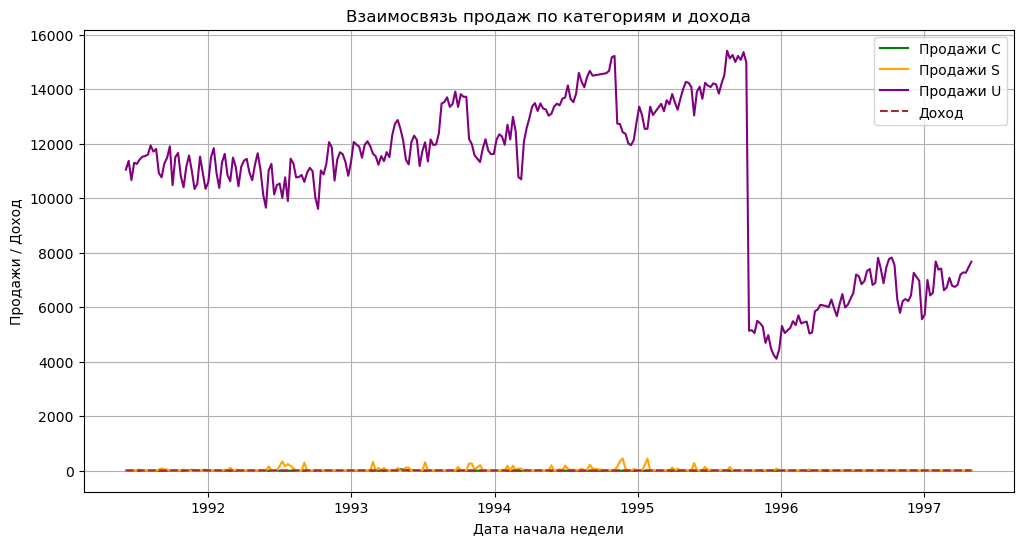

In [126]:
plt.figure(figsize=(12, 6))
plt.plot(weekly_summary['week_start'], weekly_summary['total_sale_C'], label="Продажи C", color='g')
plt.plot(weekly_summary['week_start'], weekly_summary['total_sale_S'], label="Продажи S", color='orange')
plt.plot(weekly_summary['week_start'], weekly_summary['total_sale_U'], label="Продажи U", color='purple')
plt.plot(weekly_summary['week_start'], weekly_summary['income'], label="Доход", color='brown', linestyle='--')

plt.title("Взаимосвязь продаж по категориям и дохода")
plt.xlabel("Дата начала недели")
plt.ylabel("Продажи / Доход")
plt.legend()
plt.grid()
plt.show()
